In [125]:
from glob import glob
import pandas as pd

In [126]:
df_total=pd.DataFrame()
df_추정매출=pd.DataFrame()
df_상주인구=pd.DataFrame()
df_생활인구=pd.DataFrame()
df_소득소비=pd.DataFrame()
df_아파트=pd.DataFrame()
df_영역=pd.DataFrame()
df_점포=pd.DataFrame()
df_직장인구=pd.DataFrame()
df_집객시설=pd.DataFrame()

In [127]:
path='../../data/raw data/행정동/'

#### 추정매출

In [128]:

dfs_추정매출=[]
for f_name in glob(path+'추정매출/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_추정매출.append(temp)
a,b,c,d,e=dfs_추정매출

In [129]:
df_추정매출=pd.concat([a,b,c,d,e])
df_추정매출 = df_추정매출.reset_index(drop=True)
df_추정매출.shape

(368904, 53)

In [130]:
df_추정매출['기준_년분기_코드'].unique()

array([20221, 20222, 20223, 20224, 20231, 20232, 20191, 20192, 20193,
       20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214],
      dtype=int64)

In [131]:
df_추정매출.isna().sum().sum()

0

#### 상주인구

In [132]:
dfs_상주인구=[]
for f_name in glob(path+'상주인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_상주인구.append(temp)
df_상주인구,=dfs_상주인구
df_상주인구.shape

(7629, 27)

In [133]:
df_상주인구.isna().sum()

기준_년분기_코드             0
행정동_코드                0
행정동_코드_명              0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [134]:
temp_total=0
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:418  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20223  행정동 개수:425  cnt: 18


In [135]:
# 20191, 20192, 20193 
dong_code_20191=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20191]['행정동_코드'])
dong_code_20192=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20192]['행정동_코드'])
dong_code_20193=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20193]['행정동_코드'])
dong_code_20194=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20194]['행정동_코드'])

In [136]:
total_dong_code_425=dong_code_20194.copy()
diff_191=[x for x in total_dong_code_425 if x not in dong_code_20191 ]
diff_192=[x for x in total_dong_code_425 if x not in dong_code_20192 ]
diff_193=[x for x in total_dong_code_425 if x not in dong_code_20193 ]
print("빠진 행정동 코드")
print(diff_191)
print(diff_192)
print(diff_193)
# 번1,2,3동/ 수유1,2,3동/ 항동

빠진 행정동 코드
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]


In [137]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 1,2,3분기 7개 동 데이터 없음 -> 19년 4분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row1['기준_년분기_코드']=20191
    new_row2=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row2['기준_년분기_코드']=20192
    new_row3=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row3['기준_년분기_코드']=20193
    df_상주인구 = pd.concat([df_상주인구, new_row1, new_row2, new_row3], ignore_index=True)

In [138]:
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20223  행정동 개수:425  cnt: 18


In [139]:
df_상주인구.shape

(7650, 27)

### 생활인구

In [140]:
dfs_생활인구=[]
for f_name in glob(path+'생활인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_생활인구.append(temp)
df_생활인구,=dfs_생활인구
df_생활인구.shape

(7650, 25)

In [141]:
cnt=0
for x in df_생활인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_생활인구.loc[df_생활인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  cnt: 18


In [142]:
df_생활인구.isna().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [143]:
df_생활인구.shape

(7650, 25)

### 소득소비

In [144]:
dfs_소득소비=[]
for f_name in glob(path+'소득소비/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_소득소비.append(temp)
df_소득소비,=dfs_소득소비
df_소득소비.shape

(7650, 16)

In [145]:
cnt=0
for x in df_소득소비['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_소득소비.loc[df_소득소비['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20191  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  
년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  cnt: 18


In [146]:
df_소득소비.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64

In [147]:
df_소득소비.shape

(7650, 16)

### 아파트

In [148]:
# 아파트
dfs_아파트=[]
for f_name in glob(path+'아파트/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_아파트.append(temp)
df_아파트,=dfs_아파트
df_아파트.shape

(6368, 18)

In [149]:
df_아파트.isna().sum()

기준_년분기_코드                    0
행정동_코드                       0
행정동_코드_명                     0
아파트_단지_수                     0
아파트_면적_66_제곱미터_미만_세대_수      74
아파트_면적_66_제곱미터_세대_수          3
아파트_면적_99_제곱미터_세대_수        123
아파트_면적_132_제곱미터_세대_수      1126
아파트_면적_165_제곱미터_세대_수      2989
아파트_가격_1_억_미만_세대_수         563
아파트_가격_1_억_세대_수            298
아파트_가격_2_억_세대_수            241
아파트_가격_3_억_세대_수            248
아파트_가격_4_억_세대_수            682
아파트_가격_5_억_세대_수           1368
아파트_가격_6_억_이상_세대_수        2090
아파트_평균_면적                    0
아파트_평균_시가                    0
dtype: int64

In [150]:
df_아파트.fillna(0,inplace=True)
df_아파트.isna().sum()

기준_년분기_코드                 0
행정동_코드                    0
행정동_코드_명                  0
아파트_단지_수                  0
아파트_면적_66_제곱미터_미만_세대_수    0
아파트_면적_66_제곱미터_세대_수       0
아파트_면적_99_제곱미터_세대_수       0
아파트_면적_132_제곱미터_세대_수      0
아파트_면적_165_제곱미터_세대_수      0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
아파트_평균_면적                 0
아파트_평균_시가                 0
dtype: int64

In [151]:
cnt=0
for x in df_아파트['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드_명'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:424  
년분기: 20232  행정동 개수:424  년분기: 20194  행정동 개수:425  년분기: 20201  행정동 개수:425  
년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20214  행정동 개수:424  년분기: 20221  행정동 개수:424  년분기: 20222  행정동 개수:424  
년분기: 20223  행정동 개수:424  년분기: 20224  행정동 개수:424  cnt: 15


In [152]:
cnt=0
for x in df_아파트['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:424  
년분기: 20232  행정동 개수:424  년분기: 20194  행정동 개수:425  년분기: 20201  행정동 개수:425  
년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20214  행정동 개수:424  년분기: 20221  행정동 개수:424  년분기: 20222  행정동 개수:424  
년분기: 20223  행정동 개수:424  년분기: 20224  행정동 개수:424  cnt: 15


In [153]:
# 행정동 425개 아닌 년분기
temp_아파트=[20214,20221,20222,20223,20224,20231,20232]

In [154]:
# 동 개수 425개가 아닌 년분기들의 행정동 코드 찾기
for x in temp_아파트:
    temp_code=list(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드'])
    temp_diff=[y for y in total_dong_code_425 if y not in temp_code ]
    print(f'분기:{x} 빠진 행정동 코드:{temp_diff}')

분기:20214 빠진 행정동 코드:[11740690]
분기:20221 빠진 행정동 코드:[11740690]
분기:20222 빠진 행정동 코드:[11740690]
분기:20223 빠진 행정동 코드:[11740690]
분기:20224 빠진 행정동 코드:[11740690]
분기:20231 빠진 행정동 코드:[11740690]
분기:20232 빠진 행정동 코드:[11740690]


In [155]:
# 11740690: 둔촌1동 -> 서비스X

In [156]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
        20213, 20214, 20221, 20222, 20223, 20224], dtype=int64),
 15)

In [157]:
없는_년도분기=[20191,20192,20193]
# 19년 1,2,3분기 데이터 없음 -> 19년 4분기 데이터로 추가
temp_아파트_20194=df_아파트.loc[(df_아파트['기준_년분기_코드']==20194)]
for x in 없는_년도분기: # 3개 년도분기 리스트
    new_df=temp_아파트_20194.copy()
    new_df['기준_년분기_코드']=x
    df_아파트 = pd.concat([df_아파트, new_df], ignore_index=True)

In [158]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
        20213, 20214, 20221, 20222, 20223, 20224, 20191, 20192, 20193],
       dtype=int64),
 18)

In [159]:
df_아파트.shape

(7643, 18)

### 직장인구

In [160]:
dfs_직장인구=[]
for f_name in glob(path+'직장인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_직장인구.append(temp)
df_직장인구,=dfs_직장인구
df_직장인구.shape

(7636, 24)

In [161]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  cnt: 18


In [162]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 2,3분기 7개 동 데이터 없음 -> 19년 1분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row1['기준_년분기_코드']=20192
    new_row2=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row2['기준_년분기_코드']=20193
    df_직장인구 = pd.concat([df_직장인구, new_row1, new_row2], ignore_index=True)

In [163]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  cnt: 18


In [164]:
df_직장인구.isna().sum()

기준_년분기_코드              0
행정동_코드                 0
행정동_코드_명               0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [165]:
df_직장인구.shape

(7650, 24)

### 집객시설

In [166]:
dfs_집객시설=[]
for f_name in glob(path+'집객시설/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_집객시설.append(temp)
df_집객시설,=dfs_집객시설
df_집객시설.shape

(4675, 23)

In [167]:
cnt=0
for x in df_집객시설['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_집객시설.loc[df_집객시설['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20232  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20213  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20224  행정동 개수:425  cnt: 11


In [168]:
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20232, 20231, 20204, 20214, 20211, 20212, 20221, 20222, 20213,
        20223, 20224], dtype=int64),
 11)

In [169]:
df_집객시설2019 = df_집객시설[(20191 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20194)]
df_집객시설2020 = df_집객시설[(20201 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20204)]
df_집객시설2021 = df_집객시설[(20211 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20214)]
df_집객시설2022 = df_집객시설[(20221 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20224)]
df_집객시설2023 = df_집객시설[(20231 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20234)]
df_집객시설2019.shape,df_집객시설2020.shape,df_집객시설2021.shape,df_집객시설2022.shape,df_집객시설2023.shape

((0, 23), (425, 23), (1700, 23), (1700, 23), (850, 23))

In [170]:
# 2020년 1, 2, 3분기 데이터 생성(= 2020년 4분기 copy)
df_집객시설20204 = df_집객시설2020[df_집객시설2020['기준_년분기_코드'] == 20204]

df_집객시설20201 = df_집객시설20204.copy()
df_집객시설20202 = df_집객시설20204.copy()
df_집객시설20203 = df_집객시설20204.copy()

df_집객시설20201['기준_년분기_코드'] = 20201
df_집객시설20202['기준_년분기_코드'] = 20202
df_집객시설20203['기준_년분기_코드'] = 20203

print(df_집객시설20201.shape, df_집객시설20202.shape, df_집객시설20203.shape, df_집객시설20204.shape)

df_집객시설2020 = pd.concat([df_집객시설20201, df_집객시설20202, df_집객시설20203, df_집객시설20204])
df_집객시설2020 = df_집객시설2020.reset_index(drop=True)

df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(425, 23) (425, 23) (425, 23) (425, 23)


(array([20232, 20231, 20204, 20214, 20211, 20212, 20221, 20222, 20213,
        20223, 20224], dtype=int64),
 11)

In [171]:
df_집객시설 = pd.concat([df_집객시설2019, df_집객시설2020, df_집객시설2021, df_집객시설2022, df_집객시설2023])
df_집객시설 = df_집객시설.reset_index(drop=True)
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20201, 20202, 20203, 20204, 20214, 20211, 20212, 20213, 20221,
        20222, 20223, 20224, 20232, 20231], dtype=int64),
 14)

In [172]:
df_집객시설.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
집객시설_수          0
관공서_수          28
은행_수          798
종합병원_수       5222
일반_병원_수      4032
약국_수           28
유치원_수        1974
초등학교_수        896
중학교_수        2408
고등학교_수       3052
대학교_수        4256
백화점_수        5824
슈퍼마켓_수       4690
극장_수         4900
숙박_시설_수      4536
공항_수         5922
철도_역_수       5950
버스_터미널_수     5908
지하철_역_수      2744
버스_정거장_수       14
dtype: int64

In [173]:
df_집객시설.fillna(0,inplace=True)
df_집객시설.isna().sum()

기준_년분기_코드    0
행정동_코드       0
행정동_코드_명     0
집객시설_수       0
관공서_수        0
은행_수         0
종합병원_수       0
일반_병원_수      0
약국_수         0
유치원_수        0
초등학교_수       0
중학교_수        0
고등학교_수       0
대학교_수        0
백화점_수        0
슈퍼마켓_수       0
극장_수         0
숙박_시설_수      0
공항_수         0
철도_역_수       0
버스_터미널_수     0
지하철_역_수      0
버스_정거장_수     0
dtype: int64

In [174]:
df_집객시설.shape

(5950, 23)

#### 점포

In [175]:
dfs_점포=[]
for f_name in glob(path+'점포/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_점포.append(temp)
f,g,h,i,j=dfs_점포

In [176]:
df_점포=pd.concat([f,g,h,i,j])
df_점포 = df_점포.reset_index(drop=True)
df_점포.shape

(774756, 12)

In [177]:
df_점포['기준_년분기_코드'].unique(),len(df_점포['기준_년분기_코드'].unique())

(array([20221, 20222, 20223, 20224, 20231, 20232, 20191, 20192, 20193,
        20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214],
       dtype=int64),
 18)

In [178]:
df_점포.isna().sum()

기준_년분기_코드      0
행정동_코드         0
행정동_코드_명       0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

In [179]:
df_점포.shape

(774756, 12)

## 전체 병합
- on=['기준_년분기_코드','행정동_코드','행정동_코드_명']
- on=['기준_년분기_코드','행정동_코드','행정동_코드_명','서비스_업종_코드', '서비스_업종_코드_명']

In [180]:
# 추정매출 + 집객시설
df_추정매출.shape,df_집객시설.shape

((368904, 53), (5950, 23))

In [181]:
df_집객시설.drop("행정동_코드_명", axis=1, inplace=True)
tmp1 = df_추정매출.merge(df_집객시설, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp1.shape

(368904, 73)

In [182]:
# 추정매출 + 집객시설 + 직장인구
tmp1.shape,df_직장인구.shape

((368904, 73), (7650, 24))

In [183]:
df_직장인구.drop("행정동_코드_명", axis=1, inplace=True)
tmp2 = tmp1.merge(df_직장인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp2.shape

(368904, 94)

In [184]:
# 추정매출 + 집객시설 + 직장인구 + 점포
tmp2.shape,df_점포.shape

((368904, 94), (774756, 12))

In [185]:
df_점포.drop(["행정동_코드_명", "서비스_업종_코드_명"], axis=1, inplace=True)
tmp3 = tmp2.merge(df_점포, how='left', on=['기준_년분기_코드','행정동_코드','서비스_업종_코드'])
tmp3.shape

(504400, 101)

In [186]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트
tmp3.shape,df_아파트.shape

((504400, 101), (7643, 18))

In [187]:
df_아파트.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp4 = tmp3.merge(df_아파트, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp4.shape

(504400, 116)

In [188]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비
tmp4.shape,df_소득소비.shape

((504400, 116), (7650, 16))

In [189]:
df_소득소비.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp5 = tmp4.merge(df_소득소비, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp5.shape

(504400, 129)

In [190]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구
tmp5.shape,df_상주인구.shape

((504400, 129), (7650, 27))

In [191]:
df_상주인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp6 = tmp5.merge(df_상주인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp6.shape

(504400, 153)

In [192]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구 + 생활인구
tmp6.shape,df_생활인구.shape

((504400, 153), (7650, 25))

In [193]:
df_생활인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp7 = tmp6.merge(df_생활인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp7.shape

(504400, 175)

## csv 저장

In [194]:
# 전체 데이터 변수 선언
df_dong = tmp7.copy()

# 19년 제외 na값  - 미존재
df_dong[df_dong['기준_년분기_코드'] // 10 != 2019].isna().sum().sum()

0

### full set 전처리 

In [195]:
# [이슈1] 행정동 코드 갯수와 코드명 갯수가 동일하지 않음
df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique()

(424, 430)

In [196]:
# '?' 있는 행정동 명 확인 - 동일함
print("** 전처리 전 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

# 행정동 코드 명 '?' -> '·' 가운데점으로 대체
df_dong['행정동_코드_명'] = df_dong['행정동_코드_명'].str.replace('?', '·', regex=False)

# 전처리 결과 확인 -> good!
print("** 전처리 후 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

** 전처리 전 **
['종로1?2?3?4가동' '종로5?6가동' '금호2?3가동' '면목3?8동' '중계2?3동' '상계3?4동' '상계6?7동']
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '상계3·4동' '상계6·7동' '중계2·3동']
** 전처리 후 **
[]
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '중계2·3동' '상계3·4동' '상계6·7동']


In [197]:
# [이슈2] 전처리 후에도 동일한 행정동 명 확인 -> 신사동
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

# 11620685 -> 신사동(관악구) / 11680510 -> 신사동(강남구) 변경
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11620685].index, "행정동_코드_명"] = "신사동(관악구)"
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11680510].index, "행정동_코드_명"] = "신사동(강남구)"

# 처리 결과 확인 -> 완료
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

424 423
         행정동_코드 행정동_코드_명
26090  11620685      신사동
28242  11680510      신사동
424 424
         행정동_코드  행정동_코드_명
26090  11620685  신사동(관악구)
28242  11680510  신사동(강남구)


In [198]:
# [이슈3] 항동 제거
df_dong_fin = df_dong.drop(df_dong[df_dong['행정동_코드_명']=="항동"].index, axis=0)
print(df_dong_fin[df_dong_fin['행정동_코드_명']=="항동"].sum().any())

False


In [199]:
# full set csv 저장
path2='../../data/preprocessed data/'
df_dong_fin.to_csv(path2+'dong_full_data.csv', index=False)

## 서비스 업종 선별

In [200]:
# 딕셔너리 {서비스 업종 명: 서비스 업종 코드}
service_info=dict(zip( df_추정매출['서비스_업종_코드_명'],df_추정매출['서비스_업종_코드']))
service_info

{'한식음식점': 'CS100001',
 '중식음식점': 'CS100002',
 '일식음식점': 'CS100003',
 '양식음식점': 'CS100004',
 '제과점': 'CS100005',
 '패스트푸드점': 'CS100006',
 '분식전문점': 'CS100008',
 '호프-간이주점': 'CS100009',
 '커피-음료': 'CS100010',
 '일반교습학원': 'CS200001',
 '예술학원': 'CS200003',
 '스포츠 강습': 'CS200005',
 '일반의원': 'CS200006',
 '치과의원': 'CS200007',
 '자동차미용': 'CS200026',
 '미용실': 'CS200028',
 '피부관리실': 'CS200030',
 '세탁소': 'CS200031',
 '부동산중개업': 'CS200033',
 '슈퍼마켓': 'CS300001',
 '편의점': 'CS300002',
 '미곡판매': 'CS300006',
 '육류판매': 'CS300007',
 '수산물판매': 'CS300008',
 '청과상': 'CS300009',
 '반찬가게': 'CS300010',
 '일반의류': 'CS300011',
 '신발': 'CS300014',
 '안경': 'CS300016',
 '시계및귀금속': 'CS300017',
 '의약품': 'CS300018',
 '서적': 'CS300020',
 '섬유제품': 'CS300027',
 '화초': 'CS300028',
 '인테리어': 'CS300035',
 '전자상거래업': 'CS300043',
 '치킨전문점': 'CS100007',
 '한의원': 'CS200008',
 '당구장': 'CS200016',
 '스포츠클럽': 'CS200024',
 '자동차수리': 'CS200025',
 '네일숍': 'CS200029',
 '여관': 'CS200034',
 '노래방': 'CS200037',
 '핸드폰': 'CS300004',
 '가방': 'CS300015',
 '의료기기': 'CS300019',
 '문구': 'C

In [201]:
# 우리 service 코드만 parsing
pos_serv=['한식음식점', '커피-음료', '분식전문점', '호프-간이주점', '치킨전문점', '중식음식점', '패스트푸드점', '제과점', 
          '일식음식점', '양식음식점','편의점', '일반의류', '화장품', '의약품','일반교습학원', '미용실', '세탁소']
pos_serv_code = {key: value for key, value in service_info.items() if key in pos_serv}
pos_serv_code

{'한식음식점': 'CS100001',
 '중식음식점': 'CS100002',
 '일식음식점': 'CS100003',
 '양식음식점': 'CS100004',
 '제과점': 'CS100005',
 '패스트푸드점': 'CS100006',
 '분식전문점': 'CS100008',
 '호프-간이주점': 'CS100009',
 '커피-음료': 'CS100010',
 '일반교습학원': 'CS200001',
 '미용실': 'CS200028',
 '세탁소': 'CS200031',
 '편의점': 'CS300002',
 '일반의류': 'CS300011',
 '의약품': 'CS300018',
 '치킨전문점': 'CS100007',
 '화장품': 'CS300022'}

In [202]:
fin_filter = df_dong_fin[df_dong_fin['서비스_업종_코드'].isin(pos_serv_code.values())]
fin_filter.shape

(191994, 175)

### 점포별 평균 매출 금액 컬럼 추가 
- 당월_매출_금액: 해당 상권, 서비스 업종의 모든 점포들의 매출 합
- `점포별_평균_매출_금액` = `당월_매출_금액` / `점포_수`

In [203]:
# 유사_업종_점포_수 : 매출 수집한 점포 수
fin_filter["유사_업종_점포_수"].describe()

count    191994.000000
mean         40.738705
std         117.719094
min           3.000000
25%          12.000000
50%          21.000000
75%          41.000000
max        8194.000000
Name: 유사_업종_점포_수, dtype: float64

In [204]:
fin_filter['점포별_평균_매출_금액'] = fin_filter['당월_매출_금액'] / fin_filter['유사_업종_점포_수']
fin_filter['점포별_평균_매출_금액'] .describe()

count    1.919940e+05
mean     4.137996e+07
std      6.772965e+07
min      3.760000e+01
25%      8.478787e+06
50%      2.063297e+07
75%      4.803482e+07
max      1.863250e+09
Name: 점포별_평균_매출_금액, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7001a7790>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7001a5650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f75d501d10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7001a4490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7000e9310>],
 'means': []}

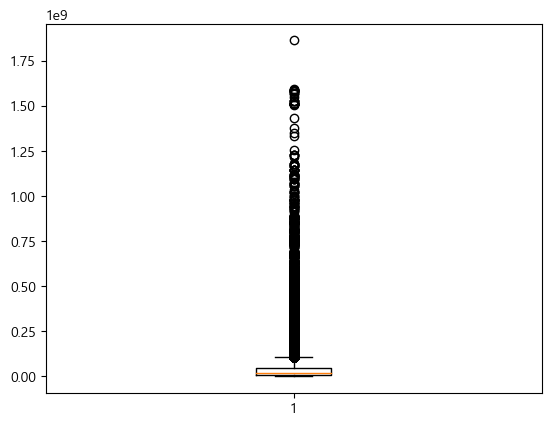

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

plt.boxplot(fin_filter['점포별_평균_매출_금액'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '20191'),
  Text(1, 0, '20192'),
  Text(2, 0, '20193'),
  Text(3, 0, '20194'),
  Text(4, 0, '20201'),
  Text(5, 0, '20202'),
  Text(6, 0, '20203'),
  Text(7, 0, '20204'),
  Text(8, 0, '20211'),
  Text(9, 0, '20212'),
  Text(10, 0, '20213'),
  Text(11, 0, '20214'),
  Text(12, 0, '20221'),
  Text(13, 0, '20222'),
  Text(14, 0, '20223'),
  Text(15, 0, '20224'),
  Text(16, 0, '20231'),
  Text(17, 0, '20232')])

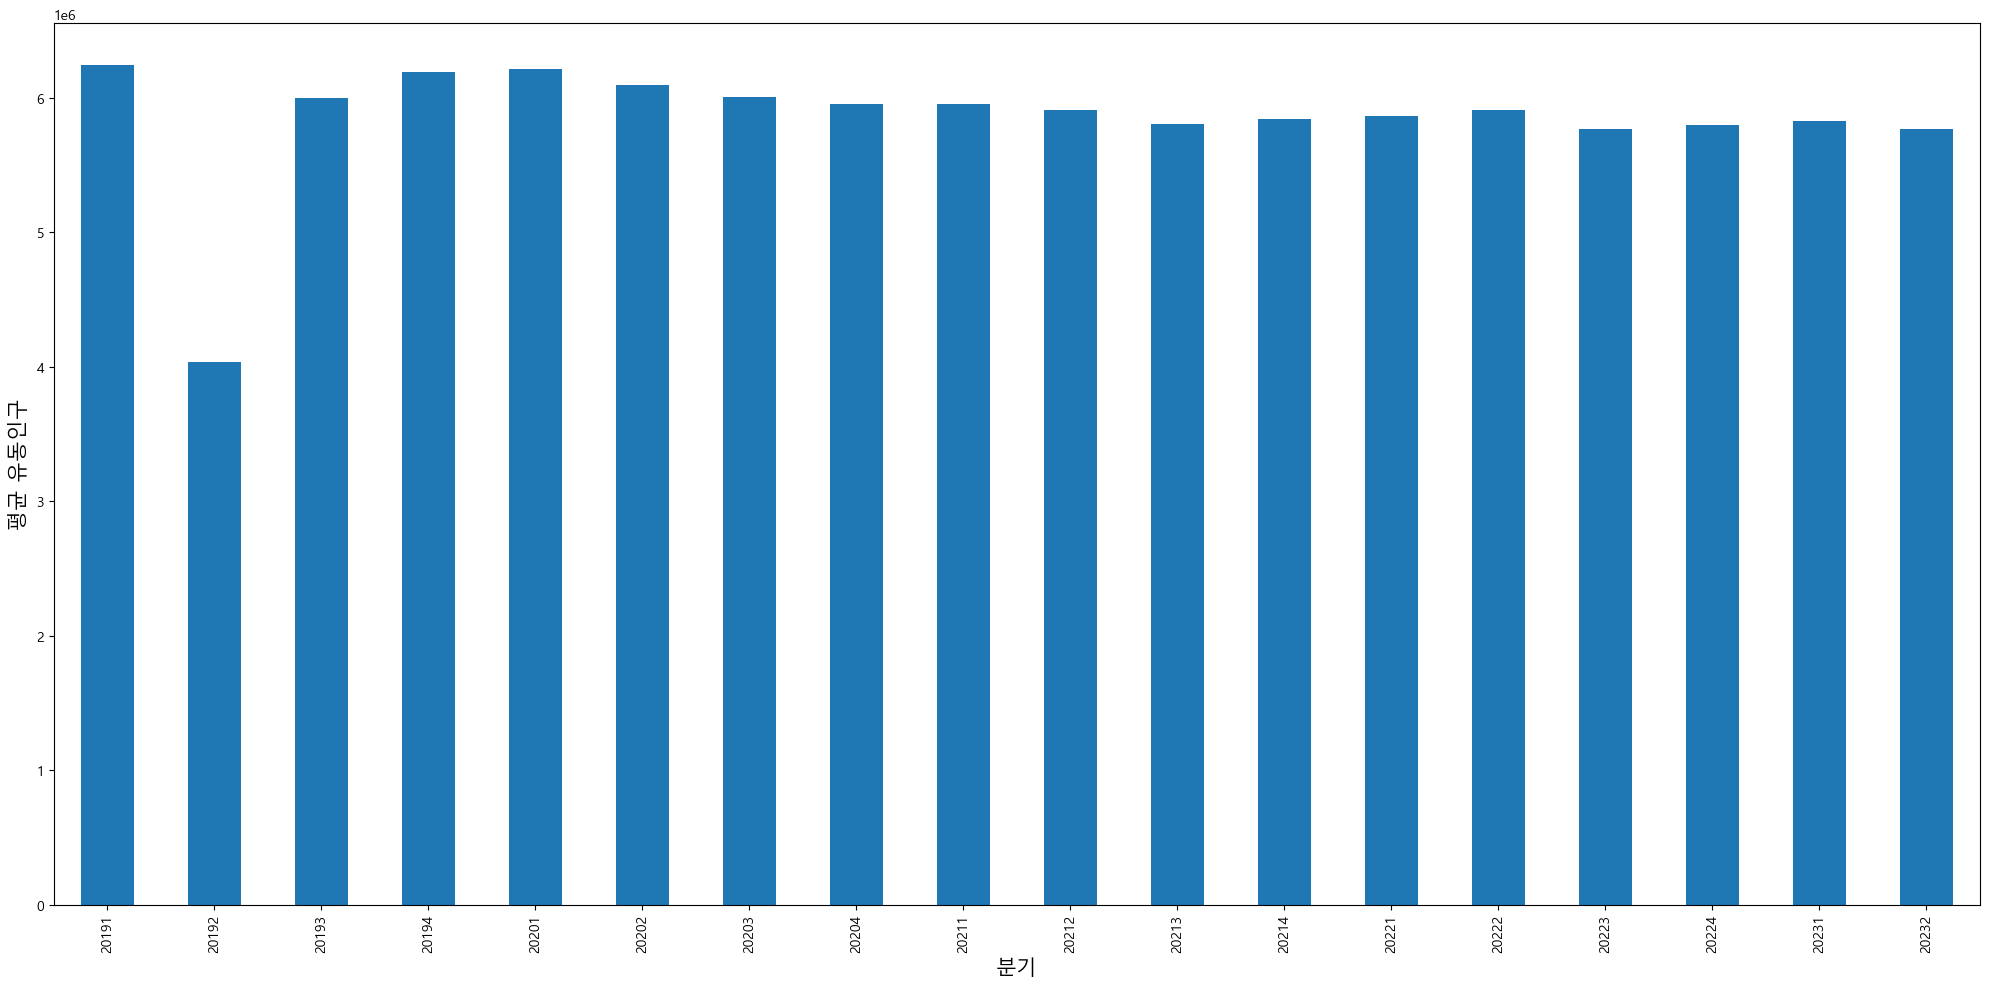

In [206]:
## 분기별 추이 확인(전체)
quarter_people = fin_filter.groupby(["기준_년분기_코드"])["총_유동인구_수"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_people.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('평균 유동인구', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)

'_summary_\n1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성\n1.1  코로나 때에는 1,2,3,4 분기별의 추이와 아닐 때 분기별 추이가 다름 -> 분기 생성\n'

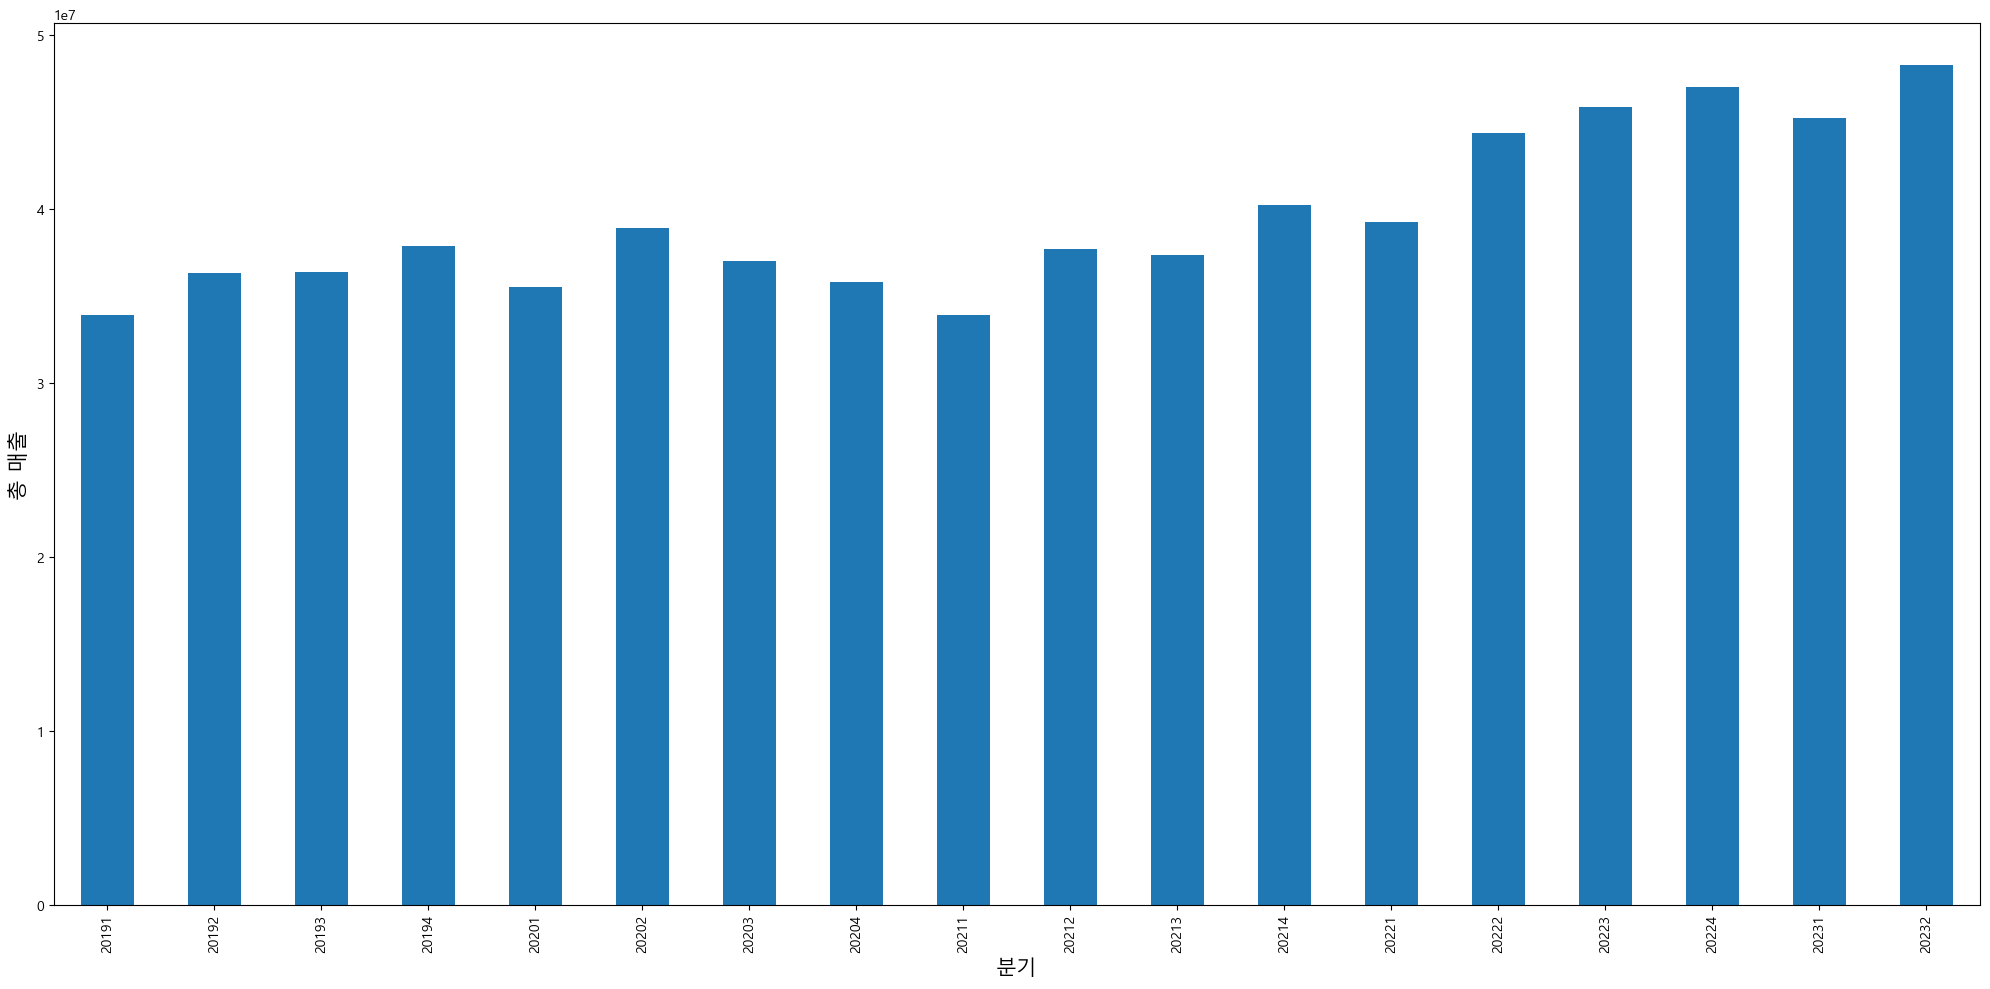

In [207]:
## 분기별 추이 확인(전체)
quarter_sales = fin_filter.groupby(["기준_년분기_코드"])["점포별_평균_매출_금액"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_sales.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('총 매출', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
 
 
"""_summary_
1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성
1.1  코로나 때에는 1,2,3,4 분기별의 추이와 아닐 때 분기별 추이가 다름 -> 분기 생성
"""

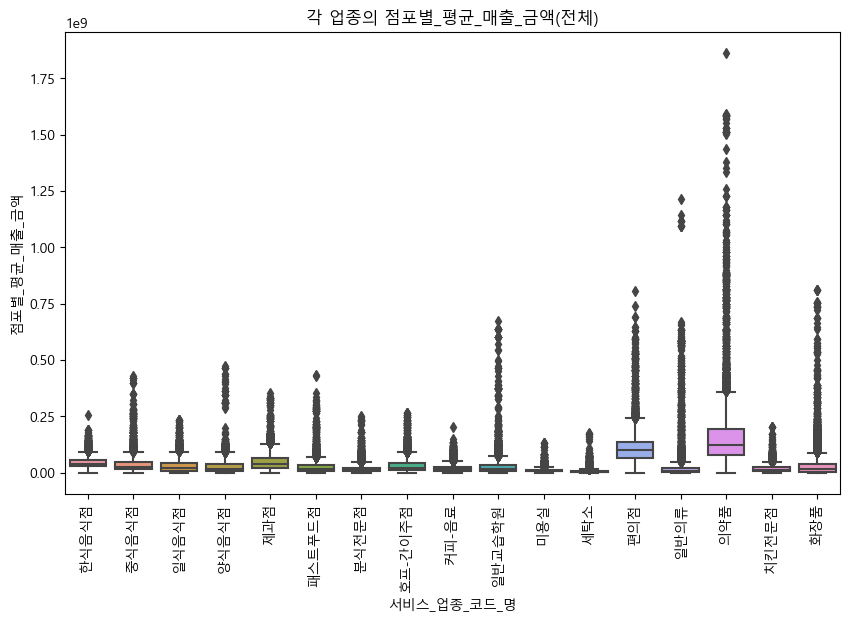

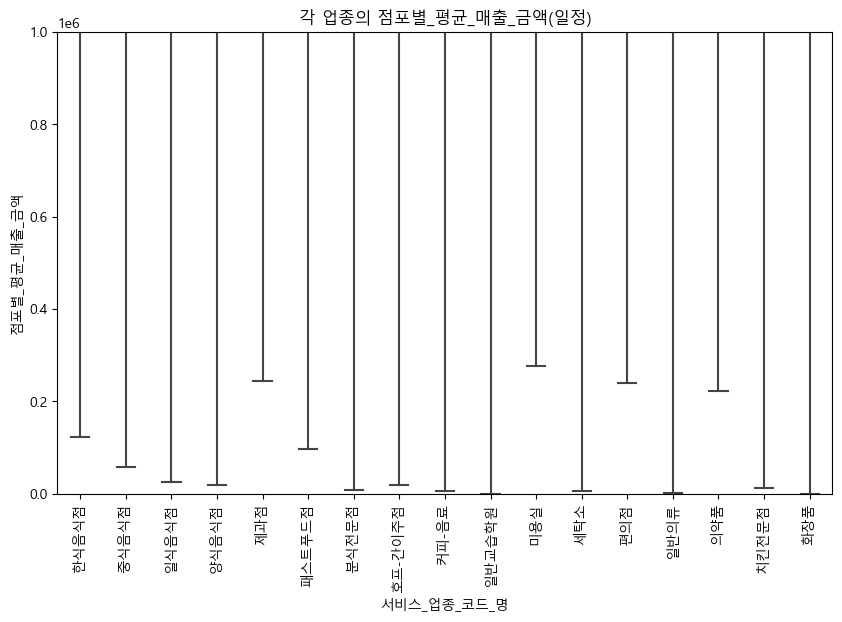

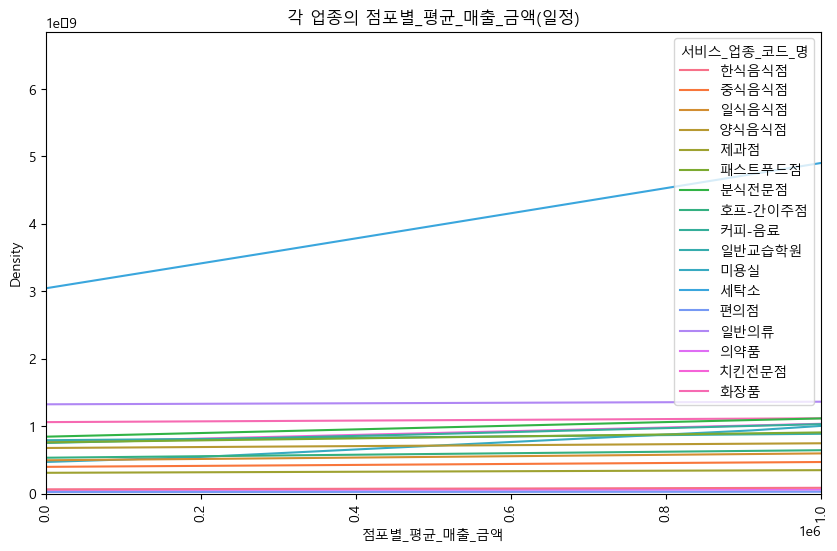

In [208]:
## 각 업종별 평균 매출 추이 파악 - 세탁소 에러 확인(제거), 100만원 이하 건수 삭제 시행
plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 1000000)
plt.xticks(rotation=90)
plt.show()

In [209]:
print('제거 전:',fin_filter.shape)
## [이슈4] 점포별_평균_매출_금액에 누락 값(이상치) 존재. 기준점을 세워 데이터 handling 진행
## [이슈5] 세탁소 제거 (현금 장사)
fin_filter_dropped = fin_filter[(fin_filter["점포별_평균_매출_금액"] > 1000000)&(fin_filter["서비스_업종_코드_명"]!="세탁소")]
print('제거 후:',fin_filter_dropped.shape)

제거 전: (191994, 176)
제거 후: (176985, 176)


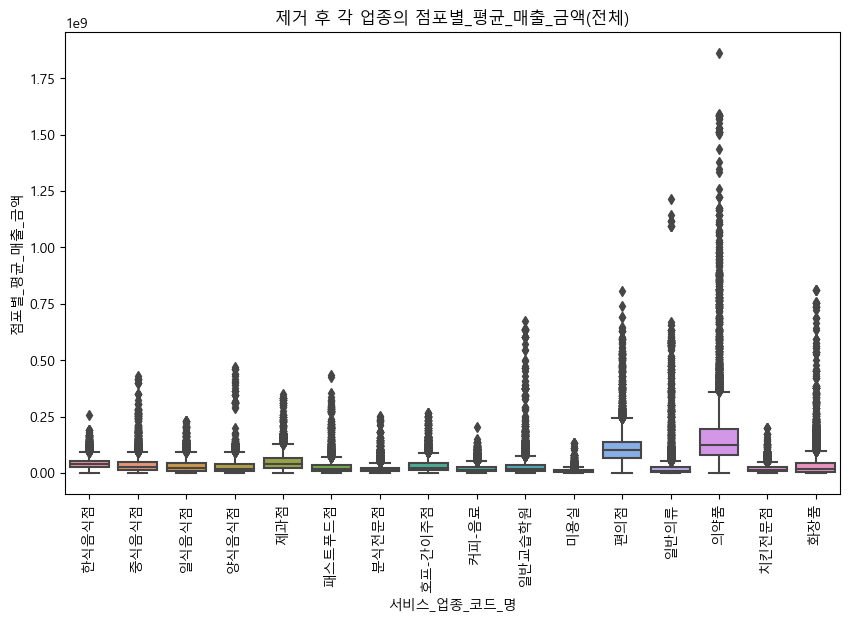

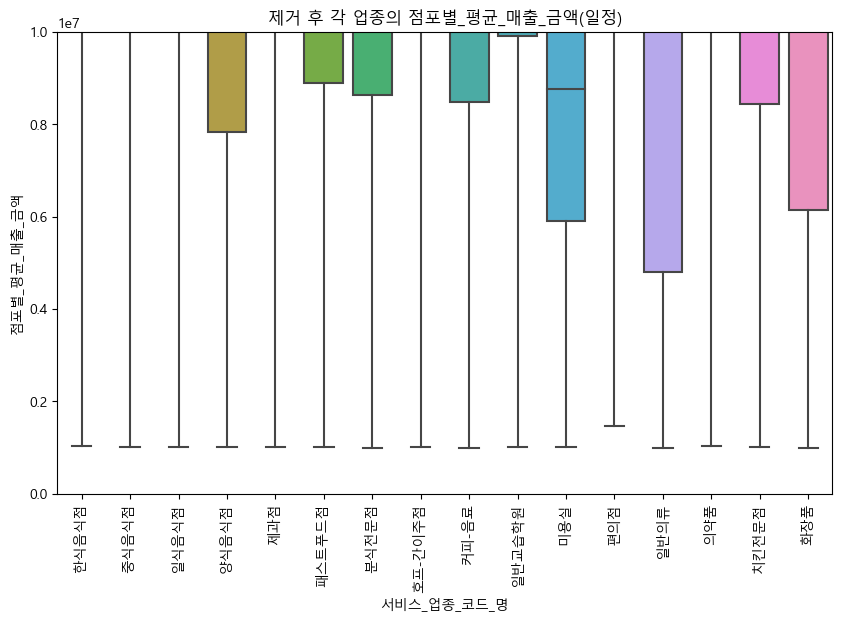

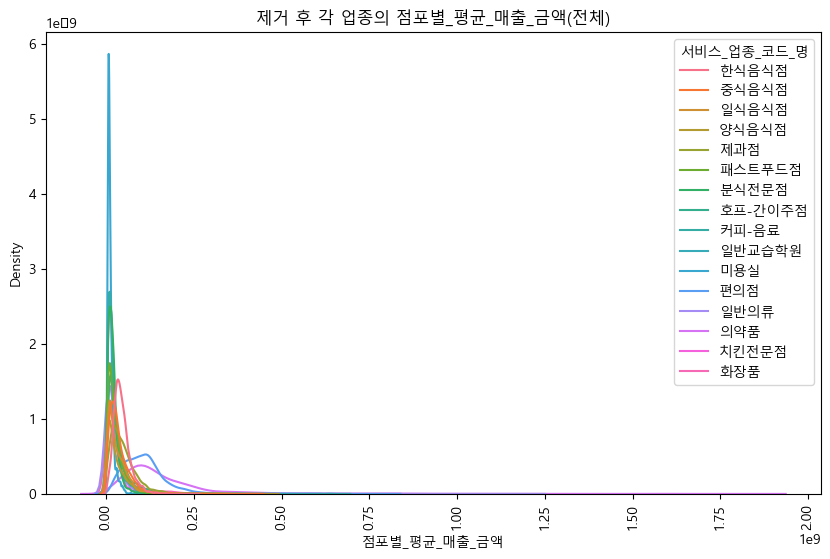

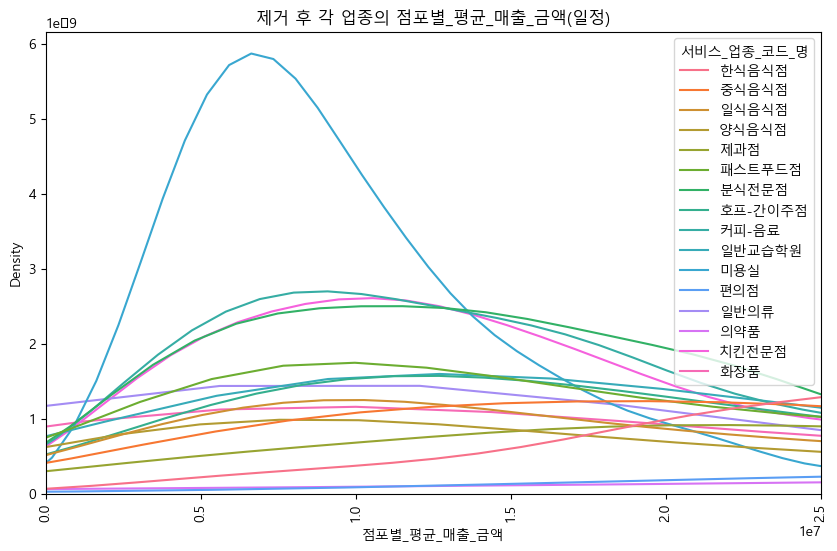

In [210]:
## 이상치 제거 후 각 업종별 평균 매출 추이 파악
plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 10000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 25000000)
plt.xticks(rotation=90)
plt.show()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,점포별_평균_매출_금액
0,20221,11110515,청운효자동,CS100001,한식음식점,3015376427,115548,2222313964,793062463,425159717,...,612787,427291,517921,518434,525407,532053,524481,510860,498361,3.242340e+07
1,20221,11110515,청운효자동,CS100001,한식음식점,3015376427,115548,2222313964,793062463,425159717,...,612787,427291,517921,518434,525407,532053,524481,510860,498361,3.242340e+07
2,20221,11110515,청운효자동,CS100002,중식음식점,42685883,2382,35347726,7338157,6851542,...,612787,427291,517921,518434,525407,532053,524481,510860,498361,1.422863e+07
3,20221,11110515,청운효자동,CS100002,중식음식점,42685883,2382,35347726,7338157,6851542,...,612787,427291,517921,518434,525407,532053,524481,510860,498361,1.422863e+07
4,20221,11110515,청운효자동,CS100003,일식음식점,211421345,9598,148402306,63019039,13978529,...,612787,427291,517921,518434,525407,532053,524481,510860,498361,1.761845e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504383,20224,11620665,서림동,CS300011,일반의류,183226148,2464,127627313,55598835,33529881,...,746300,710691,734171,711937,712950,712068,706044,755559,796564,1.409432e+07
504396,20224,11620685,신사동(관악구),CS100009,호프-간이주점,525372348,12829,330833170,194539178,52542745,...,1187461,1064531,1101476,1077198,1076339,1067420,1073522,1134348,1180911,2.501773e+07
504397,20224,11620685,신사동(관악구),CS100009,호프-간이주점,525372348,12829,330833170,194539178,52542745,...,1187461,1064531,1101476,1077198,1076339,1067420,1073522,1134348,1180911,2.501773e+07
504398,20224,11620685,신사동(관악구),CS100003,일식음식점,29900281,312,17577450,12322831,3921446,...,1187461,1064531,1101476,1077198,1076339,1067420,1073522,1134348,1180911,4.271469e+06


In [222]:
## 분기, 코로나 COL 추가
# 코로나 = 20201-20214
fin_filter_dropped["분기"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: int(str(x)[-1]))
fin_filter_dropped["코로나_여부"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: 1 if x<20221 else 0)
print(fin_filter_dropped.shape)
fin_filter_dropped[["기준_년분기_코드", "분기", "코로나_여부"]].sort_values("기준_년분기_코드")

(176985, 178)


,기준_년분기_코드,분기,코로나_여부
183911,20191,1,1
179663,20191,1,1
179659,20191,1,1
179655,20191,1,1
179650,20191,1,1
...,...,...,...
157943,20232,2,0
157942,20232,2,0
157941,20232,2,0
157965,20232,2,0


### csv 파일로 저장

In [221]:
fin_filter_dropped.to_csv(path2+'dong_service_data.csv', index=False)

## 모델 학습용 데이터

### 1. 해당 분기 매출 예측
- y: `점포별_평균_매출_금액`

### 2. 다음 분기 매출 예측
- y: 

In [213]:
# '점포별_예상_평균_매출_금액' 컬럼 생성
#predict = predict.sort_values(by=['상권_구분_코드', '상권_코드', '서비스_업종_코드', '기준_년분기_코드'])
#predict['점포별_예상_평균_매출_금액'] = predict['점포별_평균_매출_금액'].shift(-1)
#predict = predict[predict['기준_년분기_코드'] < 20232]